## Import

In [48]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(843923)

## Load File


In [3]:
tweet_feed = pd.read_csv('Dataset/cleanprep.csv', delimiter=',', error_bad_lines=False,engine = 'python', header = None)

<ipython-input-3-3b25e9967bd0>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweet_feed = pd.read_csv('Dataset/cleanprep.csv', delimiter=',', error_bad_lines=False,engine = 'python', header = None)


In [4]:
tweet_feed.head()

,0,1,2,3,4
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


## Preprocessing

In [5]:
tweet_feed.columns =['dt', 'name','text','polarity','sensitivity']

In [6]:
tweet_feed

,dt,name,text,polarity,sensitivity
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000
...,...,...,...,...,...
1412996,2018-07-24 08:17:01.654579,b'duong dao',b'#BlockBuratino https://t.co/bdlyjnIqZC',0.000000,0.000000
1412997,2018-07-24 08:17:02.342093,b'Ali Mohd',b'Cointelegraph: #CT_index Provided by Cointel...,0.000000,0.000000
1412998,2018-07-24 08:17:02.951448,b'Gilles Cottyn',b'Congrats @Bitcoin for reaching $ 8k again \x...,0.000000,0.000000
1412999,2018-07-24 08:17:03.388879,b'Mr. Jackson \xe2\x98\xaf',b'BTC wants to breakout again this morning and...,0.200000,0.100000


In [7]:
tweet_feed =tweet_feed.drop(['name','text'], axis=1)

In [8]:
tweet_feed.head()

,dt,polarity,sensitivity
0,2018-07-11 19:35:15.363270,0.007273,0.590909
1,2018-07-11 19:35:15.736769,0.000000,0.000000
2,2018-07-11 19:35:15.744769,0.625000,0.500000
3,2018-07-11 19:35:15.867339,0.000000,0.175000
4,2018-07-11 19:35:16.021448,0.333333,0.500000


In [9]:
tweet_feed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   dt           1413001 non-null  object 
 1   polarity     1413001 non-null  float64
 2   sensitivity  1413001 non-null  float64
dtypes: float64(2), object(1)
memory usage: 32.3+ MB


In [10]:
tweet_feed['dt'] = pd.to_datetime(tweet_feed['dt'])

In [11]:
tweet_feed['DateTime'] = tweet_feed['dt'].dt.floor('h')
tweet_feed.head()

,dt,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [12]:
tweet_feed_hour = tweet_feed.groupby(pd.Grouper(key='dt' ,freq='H')).size().reset_index(name='tweet_vol')

In [13]:
tweet_feed_hour.head()

,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [14]:
tweet_feed_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         302 non-null    datetime64[ns]
 1   tweet_vol  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB


In [15]:
tweet_feed_hour.index = pd.to_datetime(tweet_feed_hour.index)
tweet_feed_hour = tweet_feed_hour.set_index('dt')

In [16]:
tweet_feed_hour.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747
2018-07-11 20:00:00,4354
2018-07-11 21:00:00,4432
2018-07-11 22:00:00,3980
2018-07-11 23:00:00,3830


In [17]:
tweet_feed_hour.index = pd.to_datetime(tweet_feed_hour.index)

In [18]:
tweet_feed_hour['tweet_vol'] = tweet_feed_hour['tweet_vol'].astype(float)

In [19]:
tweet_df = tweet_feed.groupby('DateTime').agg(lambda  x: x.mean())

In [20]:
tweet_df['Tweet_vol'] = tweet_feed_hour['tweet_vol']

In [21]:
tweet_df = tweet_df.drop(tweet_df.index[0])
tweet_df.head()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-11 20:00:00,2018-07-11 20:27:49.510636288,0.102657,0.216148,4354.0
2018-07-11 21:00:00,2018-07-11 21:28:35.636368640,0.098004,0.218612,4432.0
2018-07-11 22:00:00,2018-07-11 22:27:44.646705152,0.096688,0.231342,3980.0
2018-07-11 23:00:00,2018-07-11 23:28:06.455850496,0.103997,0.217739,3830.0
2018-07-12 00:00:00,2018-07-12 00:28:47.975385344,0.094383,0.195256,3998.0


In [22]:
tweet_df = tweet_df.drop(['dt'], axis=1)

In [23]:
tweet_df.tail()

,polarity,sensitivity,Tweet_vol
DateTime,,,
2018-07-24 04:00:00,0.121358,0.236000,4475.0
2018-07-24 05:00:00,0.095163,0.216924,4808.0
2018-07-24 06:00:00,0.088992,0.220173,6036.0
2018-07-24 07:00:00,0.091439,0.198279,6047.0
2018-07-24 08:00:00,0.071268,0.218217,2444.0


In [24]:
btc_pricing = pd.read_csv('Dataset/btcSave2.csv', error_bad_lines=False, engine= 'python')

<ipython-input-24-950e4a96d7e9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  btc_pricing = pd.read_csv('Dataset/btcSave2.csv', error_bad_lines=False, engine= 'python')


In [25]:
btc_pricing['Timestamp'] = pd.to_datetime(btc_pricing['Timestamp'])
btc_pricing= btc_pricing.set_index(pd.DatetimeIndex(btc_pricing['Timestamp']))

In [26]:
btc_pricing.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,,
2018-07-10 01:00:00,2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [27]:
btc_pricing.drop(['Timestamp'], axis=1)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32
...,...,...,...,...,...,...,...
2018-07-23 21:00:00,7746.99,7763.59,7690.16,7706.00,237.63,1836633.86,7729.06
2018-07-23 22:00:00,7699.13,7759.99,7690.50,7750.09,63.31,489000.25,7724.30
2018-07-23 23:00:00,7754.57,7777.00,7715.45,7722.32,280.46,2173424.81,7749.63


In [28]:
Final_btc_pricing = pd.merge(tweet_df, btc_pricing, how='inner', left_index=True, right_index=True)

In [29]:
Final_btc_pricing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   polarity           294 non-null    float64       
 1   sensitivity        294 non-null    float64       
 2   Tweet_vol          294 non-null    float64       
 3   Timestamp          294 non-null    datetime64[ns]
 4   Open               294 non-null    float64       
 5   High               294 non-null    float64       
 6   Low                294 non-null    float64       
 7   Close              294 non-null    float64       
 8   Volume (BTC)       294 non-null    float64       
 9   Volume (Currency)  294 non-null    float64       
 10  Weighted Price     294 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 27.6 KB


In [30]:
#Technical Analysis indcitors-- making a simple moving average and relative strength index

def SMA(df,periods=5):
    """
    Calculate the Simple Moving Average for the past n days. Descending Order
    :param df:
    :param periods:
    :return:
    """
    lst = []

    for i in range(len(df)):
        if i < periods:

            #Appemd a Nana for values that you cant look back on
            lst.append(np.nan)

        else:
            # Calculating the SMA
            lst.append(round(np.mean(df[i:periods+i]), 2))

    return lst


def RSI(df, periods=5):
    """
    Calculates the Relative Strength Index

    **Values must be descending**
    """

    df = df.diff()

    lst = []

    for i in range(len(df)):
        if i < periods or i==len(df)-1:

            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)

        else:

            # Calculating the Relative Strength Index
            avg_gain = (sum([x for x in df[i:periods+i] if x >= 0]) / periods)
            avg_loss = (sum([abs(x) for x in df[i:periods+i] if x <= 0]) / periods)
            if avg_loss==0:
                lst.append(np.nan)
            else:
                rs = avg_gain / avg_loss

                rsi = 100 - (100 / (1 + rs))

                lst.append(round(rsi, 2))
    return lst

In [31]:
Final_btc_pricing['RSI']=RSI(Final_btc_pricing['Close'])
Final_btc_pricing['SMA']=SMA(Final_btc_pricing['Close'])
Final_btc_pricing=Final_btc_pricing[5:]

In [32]:
Final_btc_pricing[Final_btc_pricing['RSI']==np.nan]['RSI']=Final_btc_pricing['RSI'].mean()

In [33]:
Final_btc_pricing['RSI'][-1]=Final_btc_pricing['RSI'].mean()

In [34]:
Final_btc_pricing.tail()

,polarity,sensitivity,Tweet_vol,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,RSI,SMA
2018-07-23 21:00:00,0.107282,0.235636,5164.0,2018-07-23 21:00:00,7746.99,7763.59,7690.16,7706.00,237.63,1836633.86,7729.06,40.99000,7724.25
2018-07-23 22:00:00,0.094493,0.271796,4646.0,2018-07-23 22:00:00,7699.13,7759.99,7690.50,7750.09,63.31,489000.25,7724.30,61.02000,7728.81
2018-07-23 23:00:00,0.074246,0.231640,4455.0,2018-07-23 23:00:00,7754.57,7777.00,7715.45,7722.32,280.46,2173424.81,7749.63,10.57000,7721.72
2018-07-24 00:00:00,0.080870,0.219367,3862.0,2018-07-24 00:00:00,7722.95,7730.61,7690.17,7719.62,496.48,3830571.66,7715.44,57.14000,7721.42
2018-07-24 01:00:00,0.090717,0.212626,4620.0,2018-07-24 01:00:00,7712.46,7727.70,7691.14,7723.22,163.99,1264085.79,7708.50,56.20371,7723.22


In [35]:
RSI=Final_btc_pricing['RSI'].mean()
for i in range(len(Final_btc_pricing)):
    if np.isnan(Final_btc_pricing['RSI'][i]):
        Final_btc_pricing['RSI'][i]=RSI

<ipython-input-35-7526888b7bd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_btc_pricing['RSI'][i]=RSI


In [36]:
Final_btc_pricing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2018-07-12 01:00:00 to 2018-07-24 01:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   polarity           289 non-null    float64       
 1   sensitivity        289 non-null    float64       
 2   Tweet_vol          289 non-null    float64       
 3   Timestamp          289 non-null    datetime64[ns]
 4   Open               289 non-null    float64       
 5   High               289 non-null    float64       
 6   Low                289 non-null    float64       
 7   Close              289 non-null    float64       
 8   Volume (BTC)       289 non-null    float64       
 9   Volume (Currency)  289 non-null    float64       
 10  Weighted Price     289 non-null    float64       
 11  RSI                289 non-null    float64       
 12  SMA                289 non-null    float64       
dtypes: datetime64[ns](1), float6

In [37]:
Final_btc_pricing=Final_btc_pricing.drop(['Weighted Price', 'Timestamp'],axis=1 )

In [38]:
Final_btc_pricing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2018-07-12 01:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   polarity           289 non-null    float64
 1   sensitivity        289 non-null    float64
 2   Tweet_vol          289 non-null    float64
 3   Open               289 non-null    float64
 4   High               289 non-null    float64
 5   Low                289 non-null    float64
 6   Close              289 non-null    float64
 7   Volume (BTC)       289 non-null    float64
 8   Volume (Currency)  289 non-null    float64
 9   RSI                289 non-null    float64
 10  SMA                289 non-null    float64
dtypes: float64(11)
memory usage: 27.1 KB


In [39]:
Final_btc_pricing.columns = ['Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Close_Price', 'Volume_BTC', 'Volume_Dollar','RSI','SMA']

In [40]:
Final_btc_pricing = Final_btc_pricing[['Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Volume_BTC', 'Volume_Dollar','RSI','SMA','Close_Price']]

In [41]:
Final_btc_pricing.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
2018-07-12 01:00:00,0.100836,0.223076,3713.0,6379.13,6380.00,6347.72,141.50,900280.85,17.39,6338.58,6365.43
2018-07-12 02:00:00,0.111964,0.195043,3843.0,6365.24,6371.80,6324.48,141.30,896772.74,20.56,6331.41,6327.94
2018-07-12 03:00:00,0.105888,0.209939,3831.0,6328.40,6348.45,6302.18,162.37,1026431.72,9.25,6309.35,6326.98
2018-07-12 04:00:00,0.108117,0.208003,3743.0,6327.49,6343.22,6327.49,58.62,371327.65,7.30,6280.05,6339.50
2018-07-12 05:00:00,0.106667,0.217231,3480.0,6342.22,6344.57,6328.00,74.75,473450.28,11.33,6252.31,6333.05


Error on dropping Timestamp check

## Exploratory Analysis

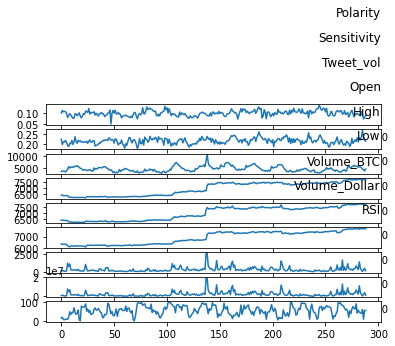

In [50]:
## Beginning the Exploratory Analysis

values = Final_btc_pricing.values
groups = range(0,9)

i = 1

pyplot.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:,group])
    plt.title(Final_btc_pricing.columns[group], y=5, loc='right')
    i += 1
plt.show()

#fix location of the labels and the size of the graph

In [45]:
Final_btc_pricing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2018-07-12 01:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       289 non-null    float64
 1   Sensitivity    289 non-null    float64
 2   Tweet_vol      289 non-null    float64
 3   Open           289 non-null    float64
 4   High           289 non-null    float64
 5   Low            289 non-null    float64
 6   Volume_BTC     289 non-null    float64
 7   Volume_Dollar  289 non-null    float64
 8   RSI            289 non-null    float64
 9   SMA            289 non-null    float64
 10  Close_Price    289 non-null    float64
dtypes: float64(11)
memory usage: 27.1 KB


In [47]:
cor = Final_btc_pricing.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
Polarity,1.000000,0.381459,-0.168510,0.180218,0.177443,0.181319,-0.065524,-0.054873,0.091997,0.182745,0.179608
Sensitivity,0.381459,1.000000,0.055267,0.199598,0.205470,0.194945,0.097006,0.112674,-0.112532,0.192593,0.197988
Tweet_vol,-0.168510,0.055267,1.000000,0.230497,0.255776,0.227724,0.545067,0.548163,0.036990,0.249955,0.243962
Open,0.180218,0.199598,0.230497,1.000000,0.997080,0.998788,0.220714,0.279706,-0.026047,0.993262,0.997170
High,0.177443,0.205470,0.255776,0.997080,1.000000,0.996602,0.274806,0.332807,-0.010229,0.995143,0.998799
Low,0.181319,0.194945,0.227724,0.998788,0.996602,1.000000,0.206410,0.266221,-0.010171,0.994043,0.998033
Volume_BTC,-0.065524,0.097006,0.545067,0.220714,0.274806,0.206410,1.000000,0.996036,0.010656,0.247356,0.247541
Volume_Dollar,-0.054873,0.112674,0.548163,0.279706,0.332807,0.266221,0.996036,1.000000,0.005996,0.304795,0.305825
RSI,0.091997,-0.112532,0.036990,-0.026047,-0.010229,-0.010171,0.010656,0.005996,1.000000,0.048485,0.001715
SMA,0.182745,0.192593,0.249955,0.993262,0.995143,0.994043,0.247356,0.304795,0.048485,1.000000,0.996438


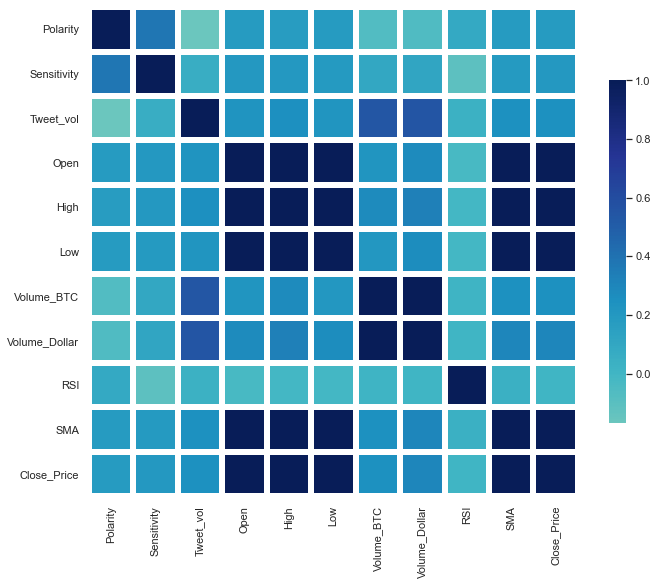

In [52]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(11,9))

ax = sns.heatmap(cor, cmap="YlGnBu", vmax=1 , center=0, square=True, linewidths=5, cbar_kws={"shrink": .7})
plt.show()

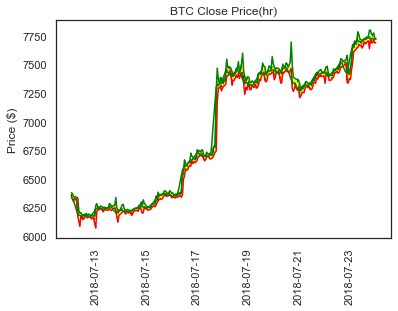

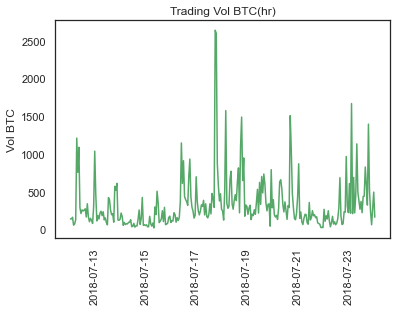

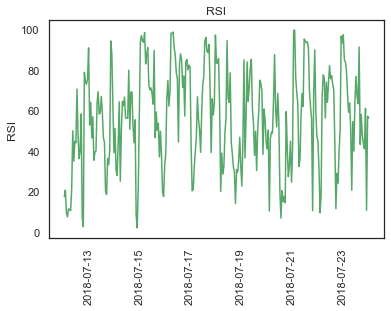

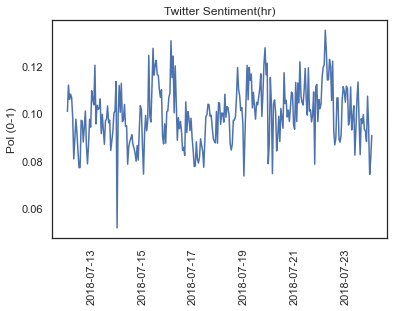

No handles with labels found to put in legend.


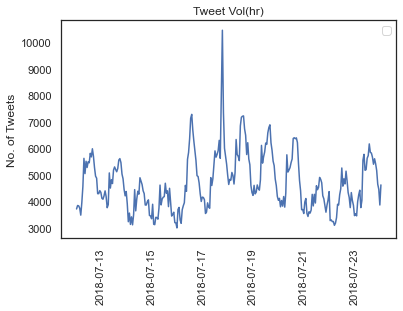

No handles with labels found to put in legend.


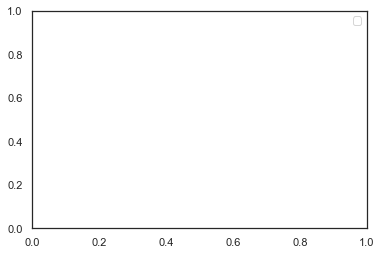

In [53]:
plt.plot(Final_btc_pricing.index, Final_btc_pricing['Close_Price'], 'black')
plt.plot(Final_btc_pricing.index, Final_btc_pricing['Open'], 'yellow')
plt.plot(Final_btc_pricing.index, Final_btc_pricing['Low'], 'red')
plt.plot(Final_btc_pricing.index, Final_btc_pricing['High'], 'green')
plt.plot(Final_btc_pricing.index, Final_btc_pricing['SMA'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_btc_pricing.index, Final_btc_pricing['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_btc_pricing.index, Final_btc_pricing['RSI'], 'g')
plt.title('RSI')
plt.xticks(rotation='vertical')
plt.ylabel('RSI');
plt.show();

plt.plot(Final_btc_pricing.index, Final_btc_pricing['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

plt.plot(Final_btc_pricing.index, Final_btc_pricing['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();
plt.legend()5

In [54]:
Final_btc_pricing['time'] = Final_btc_pricing.index.to_series().apply(lambda x: x.strftime("%X"))

In [55]:
hourly_pricing = Final_btc_pricing

In [56]:
hourly_pricing = hourly_pricing.groupby('time').agg(lambda x: x.mean())

In [57]:
hourly_pricing

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
time,,,,,,,,,,,
00:00:00,0.089958,0.213147,3974.583333,6976.966667,7006.453333,6945.485000,339.360000,2.347667e+06,58.377500,6992.156667,6982.315000
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,52.452593,6946.392308,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,57.580833,6886.329167,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,53.928333,6887.941667,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,51.134167,6887.487500,6890.985000
05:00:00,0.108032,0.215058,3904.166667,6891.468333,6911.175833,6869.017500,213.315000,1.524601e+06,53.978333,6886.956667,6890.451667
06:00:00,0.104412,0.210424,3760.250000,6889.327500,6907.070833,6868.484167,183.329167,1.281427e+06,56.271667,6889.985000,6891.371667
07:00:00,0.100942,0.209435,4056.000000,6891.645833,6908.654167,6858.290833,329.882500,2.263694e+06,56.991667,6893.228333,6878.757500
08:00:00,0.099380,0.210113,5095.583333,6878.635833,6903.660833,6851.435833,368.109167,2.616314e+06,60.749476,6901.955000,6885.867500


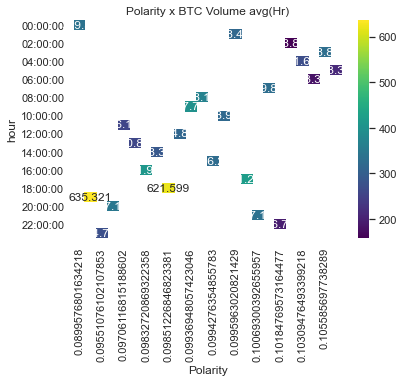

In [59]:
#sns Hourly Heatmap
hourly_pricing['hour'] = hourly_pricing.index
result = hourly_pricing.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()

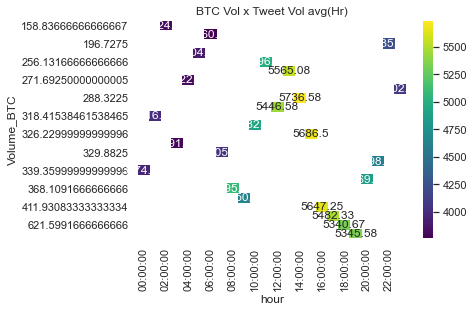

In [58]:
hourly_pricing['hour'] = hourly_pricing.index
result = hourly_pricing.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

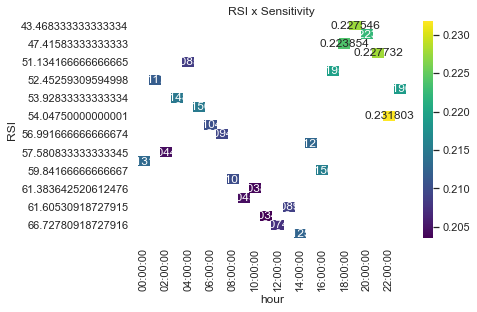

In [60]:
hourly_pricing['hour'] = hourly_pricing.index
result = hourly_pricing.pivot(index='RSI', columns='hour', values='Sensitivity')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('RSI x Sensitivity')
plt.show()

#### LSTM Prep

In [61]:
df = Final_btc_pricing

In [62]:
df = df.drop(['Open','High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,RSI,SMA,Close_Price,time
2018-07-12 01:00:00,0.100836,0.223076,3713.0,141.50,17.39,6338.58,6365.43,01:00:00
2018-07-12 02:00:00,0.111964,0.195043,3843.0,141.30,20.56,6331.41,6327.94,02:00:00
2018-07-12 03:00:00,0.105888,0.209939,3831.0,162.37,9.25,6309.35,6326.98,03:00:00
2018-07-12 04:00:00,0.108117,0.208003,3743.0,58.62,7.30,6280.05,6339.50,04:00:00
2018-07-12 05:00:00,0.106667,0.217231,3480.0,74.75,11.33,6252.31,6333.05,05:00:00


In [63]:
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC','RSI','SMA']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC,RSI,SMA
2018-07-12 01:00:00,6365.43,0.100836,0.223076,3713.0,141.50,17.39,6338.58
2018-07-12 02:00:00,6327.94,0.111964,0.195043,3843.0,141.30,20.56,6331.41
2018-07-12 03:00:00,6326.98,0.105888,0.209939,3831.0,162.37,9.25,6309.35
2018-07-12 04:00:00,6339.50,0.108117,0.208003,3743.0,58.62,7.30,6280.05
2018-07-12 05:00:00,6333.05,0.106667,0.217231,3480.0,74.75,11.33,6252.31


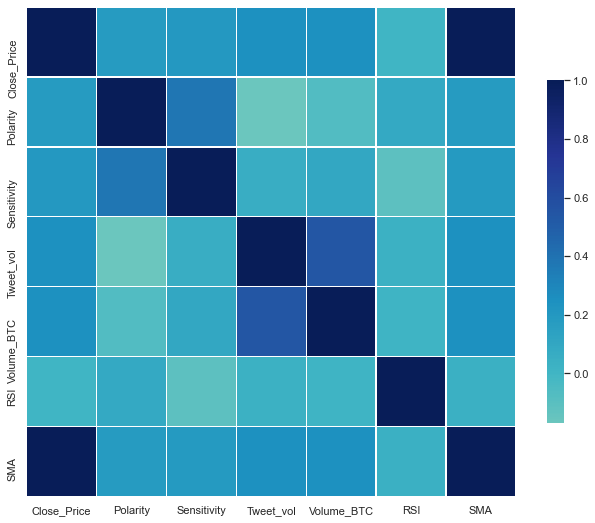

In [64]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

#cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap="YlGnBu", vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [69]:
##LSTM MODEL
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]